# Principal Component Analysis (PCA)


PCA can be used to improve the performance of clustering algorithms, as well as to reduce the computational complexity.

---
##1.&nbsp; Import libraries and files 💾

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs

from sklearn import set_config
set_config(transform_output="pandas")

In [2]:
# Get the spreadsheet ID and name
sheet_id = "1cQvzlF8bXEx7tpBlInpYmVaUtCvZuDnBTjhlejtUT_0"
sheet_name = "0"

# Construct the URL to the CSV export of the spreadsheet
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={sheet_name}"

# Read the CSV data into a Pandas DataFrame
# Set the index column to `student` and only read the first 15 rows
foods_df = pd.read_csv(url,
                       index_col="student")

# Drop the `favorite_color` column
foods_df = foods_df.drop(columns="favorite_color")

---
##2.&nbsp; Scale the data 📐
In this notebook, we are only using the MinMaxScaler to keep the code simple and focus on PCA. However, we encourage you to experiment with other scalers, as they can have a impact.

In [3]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_features_df = my_min_max.fit_transform(foods_df)

---
##3.&nbsp; Baseline model 🌱

We will start by creating a basic k-means model. Later, we will apply PCA and compare the clusters to this baseline model to see if there is any difference.

In [4]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(scaled_features_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to a new DataFrame
clusters_df = pd.DataFrame(index=foods_df.index,
                           data={"Base model": clusters})

clusters_df

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Base model
student,
Christian,2
Florian,1
Hajer,1
Hans,1
Ikbel,1
Imen,1
Jan,2
Lawrence,2
Marina,3


In [ ]:
clusters

---
##4.&nbsp; PCA ⚙️
As you saw on the LMS, PCA creates as many principal components as the original DataFrame has columns. We then need to decide how many of these components to keep. Before we do that, let's look at how PCA transforms our DataFrame.

In [6]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_features_df)

# Transform scaled_features_df based on the fit calculations
pca_basic_df = pca.transform(scaled_features_df)

pca_basic_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
student,,,,,,,,,,
Christian,-0.508045,-0.444270,0.080522,0.056607,0.118506,-0.468853,0.218121,-0.110563,0.306079,-0.073402
Florian,0.591133,-0.761835,0.005461,-0.213927,-0.043246,0.010351,0.671213,0.188591,-0.102255,0.097826
Hajer,0.945144,0.080852,0.130747,0.620998,-0.403421,0.139889,-0.153540,-0.103723,0.159070,-0.011080
Hans,0.547739,0.453962,0.628110,-0.378904,-0.165824,0.062825,0.002234,-0.032288,-0.062732,0.133494
Ikbel,0.250141,0.052901,0.179348,-0.016677,0.329017,-0.011063,-0.122992,0.158402,-0.055438,-0.197226
Imen,0.785159,0.302054,-0.143275,-0.328251,-0.014816,-0.182273,-0.161197,-0.128984,0.149441,-0.104792
Jan,-0.528778,-0.407403,0.165609,-0.500983,-0.262963,0.580935,-0.102754,0.170472,0.078542,-0.153078
Lawrence,-0.808359,-0.220979,-0.228629,0.575577,-0.107020,0.321460,-0.001901,-0.145902,0.068978,0.153984
Marina,-0.359813,0.925685,-0.183624,-0.216486,-0.122138,-0.097856,0.075808,-0.063425,-0.184297,0.112917


> You may notice that we have the same amount of columns as before but we have lost the column names. This is because the columns are now principal components and not the original features (danceability, speechiness, etc...). Principal components are an abstraction of the original features, capturing the most significant patterns and trends within the data. They are like new axes along which the data is spread out, representing directions of maximum variance. The first principal component explains the largest amount of variance, followed by the second, and so on.

###4.1.&nbsp; Identifying the most informative principal components
Principal component analysis (PCA) assumes that variance is information. This means that PCA believes that the directions in which the data varies the most are the most important.

When we fit PCA to our data, it calculates all of the principal components. We can see how much variance each principal component explains using the `explained_variance_ratio_` attribute.
> The principal components are ranked in order of decreasing variance, with the first principal component explaining the most variance in the data

In [7]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_

explained_variance_array

array([0.27480052, 0.21087612, 0.13147565, 0.12793776, 0.06464133,
       0.05803697, 0.05606377, 0.03858295, 0.02177867, 0.01580625])

To determine how many principal components to keep, we can use one of two methods:

- **Elbow method**: This is a more manual approach where we plot the explained variance of each principal component against its index. The elbow point is the point at which the explained variance starts to drop off significantly. This is the point at which it is no longer worth retaining any more principal components, as they are not explaining much additional variance.
- **Cumulative explained variance**: This is a more automated approach where SKLearn calculates how many principal components contain a given amount of variance, such as 95%.

####4.1.1.&nbsp; Elbow method
The elbow method works by plotting the variance of each principal component against its index.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


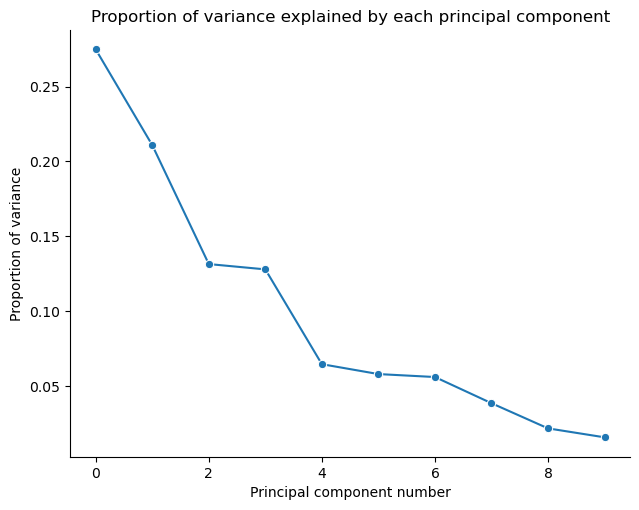

In [8]:
# Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

# Add a column for the principal component index
explained_variance_array_df["Principal component index"] = range(len(explained_variance_array))

(
# Create a line chart with sns.relplot
sns.relplot(
    kind='line',
    data=explained_variance_array_df,
    x="Principal component index",
    y="Variance explained",
    marker='o',
    aspect=1.3)
# Set the title of the plot
.set(title="Proportion of variance explained by each principal component")
# Set the axis labels
.set_axis_labels("Principal component number", "Proportion of variance")
);

Just like the elbow method used to determine the optimal number of clusters for k-means clustering, we are looking for a point where the decrease in variance levels off. This point, known as the elbow point, marks the point at which the explained variance starts to reduce significantly.

In [12]:
# Set the variable elbow to where you believe the elbow is
elbow = 4

Let's make a DataFrame containing these principle components

In [13]:
# Create a PCA object with {elbow} principal components
# We add 1 as the principal components start at 0 and not 1
pca_elbow = PCA(n_components=elbow + 1)

# Fit the PCA object to the scaled features dataframe and transform it
pca_elbow_df = pca_elbow.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4
student,,,,,
Christian,-0.508045,-0.444270,0.080522,0.056607,0.118506
Florian,0.591133,-0.761835,0.005461,-0.213927,-0.043246
Hajer,0.945144,0.080852,0.130747,0.620998,-0.403421
Hans,0.547739,0.453962,0.628110,-0.378904,-0.165824
Ikbel,0.250141,0.052901,0.179348,-0.016677,0.329017
Imen,0.785159,0.302054,-0.143275,-0.328251,-0.014816
Jan,-0.528778,-0.407403,0.165609,-0.500983,-0.262963
Lawrence,-0.808359,-0.220979,-0.228629,0.575577,-0.107020
Marina,-0.359813,0.925685,-0.183624,-0.216486,-0.122138


Let's compare the clusters made when using PCA to when not using PCA.
> It's helpful to demonstrate this on a small dataset so you can easily grasp the concept of PCA before scaling up. However, it's unlikely we'll see a dramatic difference, if any, on such a small dataset. This is normal, and you shouldn't worry about it. As long as you understand the principle of what's happening, this will help you throughout the bootcamp as you learn about machine learning on larger datasets.

In [14]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_elbow_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df[f"PCA - {elbow}"] = clusters

clusters_df

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Base model,PCA - 7,PCA - 4
student,,,
Christian,2,3,3
Florian,1,2,2
Hajer,1,2,1
Hans,1,0,1
Ikbel,1,0,1
Imen,1,0,1
Jan,2,3,0
Lawrence,2,3,3
Marina,3,1,0


####4.1.2.&nbsp; Cumulative explained variance
Cumulative explained variance (CEV) is calculated by summing the explained variance of each principal component. The CEV plot shows how much variance is explained by each principal component, as well as the cumulative variance explained by all principal components up to that point.

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


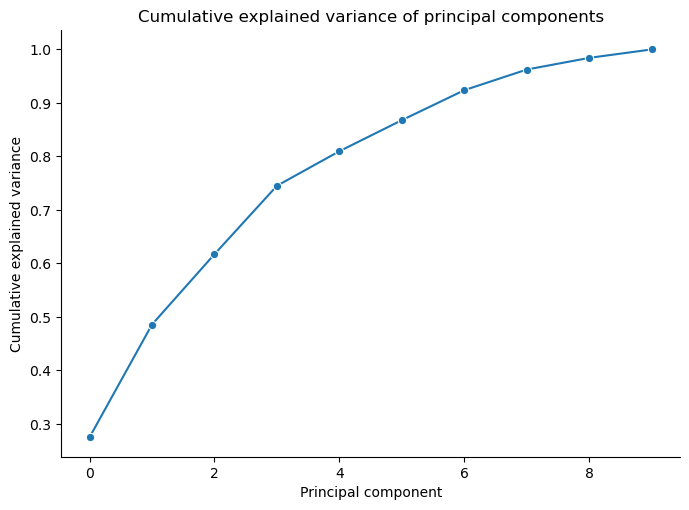

In [15]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

We can also look for an elbow in the cumulative variance plot to determine how many principal components to retain. However, instead of doing that, we will set a cumulative variance threshold in the PCA constructor. This threshold tells scikit-learn how many principal components to retain. For example, 0.95 tells scikit-learn that we want to retain as many principle components as contain 95% or more of the variance.

In [16]:
# Create a PCA object
pca_variance = PCA(n_components=0.95)

Let's visualise this threshold

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


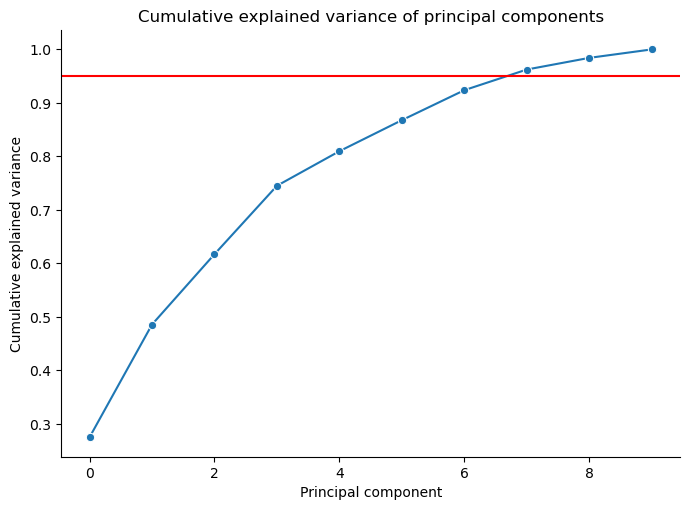

In [17]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y=0.95,
            color='red');

Let's apply this to our scaled data

In [18]:
# Fit the PCA object to the scaled features dataframe and transform it
pca_variance_df = pca_variance.fit_transform(scaled_features_df)

# The dataframe now contains the principal components of the scaled features dataframe
pca_variance_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7
student,,,,,,,,
Christian,-0.508045,-0.444270,0.080522,0.056607,0.118506,-0.468853,0.218121,-0.110563
Florian,0.591133,-0.761835,0.005461,-0.213927,-0.043246,0.010351,0.671213,0.188591
Hajer,0.945144,0.080852,0.130747,0.620998,-0.403421,0.139889,-0.153540,-0.103723
Hans,0.547739,0.453962,0.628110,-0.378904,-0.165824,0.062825,0.002234,-0.032288
Ikbel,0.250141,0.052901,0.179348,-0.016677,0.329017,-0.011063,-0.122992,0.158402
Imen,0.785159,0.302054,-0.143275,-0.328251,-0.014816,-0.182273,-0.161197,-0.128984
Jan,-0.528778,-0.407403,0.165609,-0.500983,-0.262963,0.580935,-0.102754,0.170472
Lawrence,-0.808359,-0.220979,-0.228629,0.575577,-0.107020,0.321460,-0.001901,-0.145902
Marina,-0.359813,0.925685,-0.183624,-0.216486,-0.122138,-0.097856,0.075808,-0.063425


Great! Now we can view the clusters created by this model alongside our baseline and elbow clusters.

In [19]:
# Initialise the model
my_kmeans = KMeans(n_clusters= 4, # you always choose the number of k here
                   n_init="auto",
                   random_state = 123)

# Fit the model to the data
my_kmeans.fit(pca_variance_df)

# Obtain the cluster output
clusters = my_kmeans.labels_

# Attach the cluster output to our clusters_df DataFrame
clusters_df["PCA - 0.95"] = clusters

clusters_df

c:\Users\Marvin\miniconda3\envs\myenv\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Base model,PCA - 7,PCA - 4,PCA - 0.95
student,,,,
Christian,2,3,3,3
Florian,1,2,2,2
Hajer,1,2,1,2
Hans,1,0,1,0
Ikbel,1,0,1,0
Imen,1,0,1,0
Jan,2,3,0,3
Lawrence,2,3,3,3
Marina,3,1,0,1


As mentioned earlier, it's unlikely you'll see much difference, if any, here, since small datasets typically have less noise and fewer columns to remove.

###4.2.&nbsp; Using PCA on a bigger dataset
Let's look at how useful PCA can be as your datasets get bigger

Sklearn `make_blobs` creates artificial datasets with distinct clusters. Specifically, it creates a specified number of clusters, each with a defined center and standard deviation, and generates a set of random data points around these cluster centers.

In [ ]:
X, _ = make_blobs(n_samples=1000,
                  n_features=80,
                  centers=30,
                  random_state=123)

blobs_df = pd.DataFrame(X)

blobs_df

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-1.701211,-6.399239,-7.729052,2.265238,8.432041,9.277738,-3.215520,8.544695,6.099043,0.014891,...,9.396956,5.661922,2.934566,3.170368,-7.399278,-0.832894,-0.999056,-8.342735,-10.092994,-10.179048
1,6.278723,-1.685660,-8.218419,1.232155,4.975136,3.283750,-7.377526,-2.714595,-3.882671,-1.899557,...,5.466632,2.652671,-9.222847,9.538737,-7.463871,2.315972,-2.579873,8.930986,9.458209,-4.704239
2,0.362480,6.060881,8.326247,-8.100459,3.719719,5.852855,-3.622466,10.132258,-4.990926,-10.128942,...,-4.794613,-5.285732,2.524211,-0.303708,-3.738831,-8.620748,0.995726,-3.263961,-1.606649,-2.287265
3,-7.898993,7.340964,8.437767,1.638283,-10.638737,-5.494111,4.355004,6.773989,-1.184502,-2.607903,...,0.693676,2.874440,4.808158,-6.888949,7.978908,1.088713,-8.015163,3.873678,-6.091533,-9.308514
4,-1.966892,4.560141,0.305921,-9.505989,2.049690,4.833094,-3.366090,6.964881,6.073835,-0.826616,...,-6.015234,-5.711455,-4.577501,6.368909,7.408595,-10.217053,-3.956262,9.250847,0.802116,3.455974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5.037868,-1.052171,-1.696614,-3.589264,1.354960,-7.171995,-6.449717,7.796660,-7.974470,9.057194,...,0.628226,8.164277,0.225216,5.006440,-8.500344,8.669795,9.208054,-4.265727,5.286935,4.811373
996,4.966277,-1.962102,-0.405020,-5.171068,1.487542,-8.193387,-5.577824,6.705522,-9.944412,7.558356,...,3.103869,9.523761,-1.618870,5.583400,-11.195325,7.614480,8.127628,-4.248268,4.068702,7.036022
997,3.113358,-6.218700,-7.158985,3.228768,3.312216,-0.032758,8.548647,4.993490,0.905350,-1.923980,...,-7.073941,8.812679,3.583802,5.988114,-8.865571,-0.392879,1.778686,-6.369937,-7.159916,2.437978
998,-3.098527,0.416230,-9.574874,6.547465,8.146674,0.221676,-4.811377,8.627207,-2.746769,2.801459,...,-7.886887,2.117376,-0.069422,-7.265878,-9.514596,-1.640425,2.925496,-2.944405,-2.298123,6.162888


Scale our created data

In [ ]:
# Initialise the transformer (optionally, set parameters)
my_min_max = MinMaxScaler()

# Use the transformer to transform the data
scaled_blobs_df = my_min_max.fit_transform(blobs_df)

Perform PCA on our scaled data

In [ ]:
# Initialise the PCA object
pca = PCA()

# Fit the PCA object to the data
pca.fit(scaled_blobs_df)

PCA()

Extract the explained variance for each Principal Component

In [ ]:
explained_blobs_variance_array = pca.explained_variance_ratio_

Plot the cumulative sum of the extracted variances

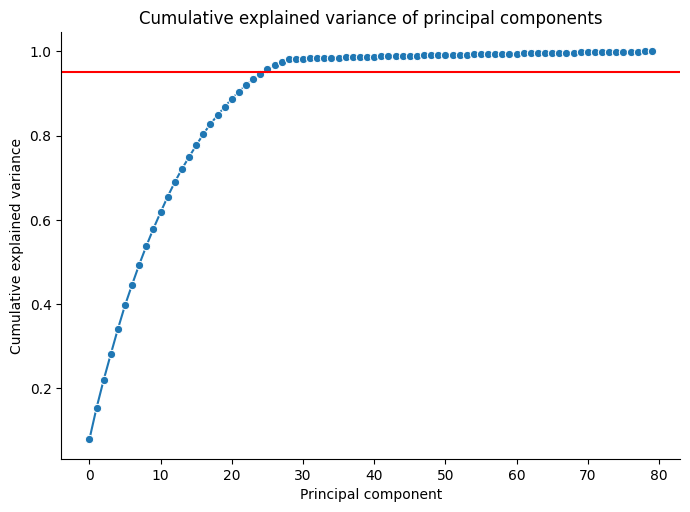

In [ ]:
(
# Create a cumulative explained variance plot
sns.relplot(
    kind="line",  # Create a line plot
    x=np.arange(len(explained_blobs_variance_array)),  # Set the x-axis to be the principal component index
    y=np.cumsum(explained_blobs_variance_array),  # Set the y-axis to be the cumulative explained variance
    marker="o",  # Use a circle marker for the data points
    aspect=1.4,  # Set the aspect ratio of the plot to be 1.4
)
# Set the title of the plot
.set(title="Cumulative explained variance of principal components")
# Set the axis labels
.set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y=0.95,
            color='red');

Find out how many components make up 95% of the variance

In [ ]:
# Calculate the cumulative sum
cumulative_sum = np.cumsum(explained_blobs_variance_array)

# Find the index where the cumulative sum reaches 0.95
index = np.searchsorted(cumulative_sum, 0.95)

# Print the number of components required to reach 0.95 variance
print(index + 1)

26


In this example, we were able to successfully reduce an 80-dimensional dataset to a more manageable 26-dimensional representation. This significant reduction in dimensionality not only helps to minimize noise but also substantially improves training times.

---
##5.&nbsp; Challenge: apply this to the spotify dataset 😃
Use PCA to reduce noise and the dimensionality of the Spotify dataset before clustering the songs. This will help to identify the most important features of the songs, and it will also make the clustering process more efficient.

Once you have clustered the songs using the selected principal components, you can analyse the clusters to identify groups of similar songs. For example, you could look for clusters of songs with similar genres, tempos, or moods.